In [48]:
%pip install pandas 
%pip install matplotlib 
%pip install seaborn 
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Selección del Dataset de Trabajo

## 1. Selección del dataset de trabajo

Para este análisis, se ha seleccionado la ciudad de **Hawaii, Hawaii, United States**. Los datasets disponibles para esta región proporcionan una visión detallada del mercado inmobiliario y las opiniones de los usuarios, lo que facilita tanto el análisis de características de las propiedades como la interpretación de su desempeño en función del tiempo.

Los archivos seleccionados son:

1. **listings.csv**: Contiene información detallada y métricas de las propiedades en Hawaii, lo cual es ideal para la visualización y análisis de las características de las viviendas, como precios, ubicaciones, amenities, entre otros factores relevantes.
2. **reviews.csv**: Proporciona datos sobre las reseñas de las propiedades y está vinculado a los ID de las propiedades. Esto es útil para realizar análisis temporales basados en las opiniones de los usuarios, lo que puede brindar información adicional sobre la percepción de las propiedades a lo largo del tiempo.

Estos conjuntos de datos permitirán realizar un análisis exhaustivo que considere tanto las características intrínsecas de las propiedades como la evolución de las opiniones de los clientes, ayudando a identificar oportunidades de inversión inmobiliaria en la región de Hawaii.

## 2. Entendimiento inicial de datos

In [35]:
# Cargar el dataset
listings_df = pd.read_csv('listings.csv')

In [60]:
# Dimensiones del dataset
print(f"El dataset tiene {listings_df.shape[0]} filas y {listings_df.shape[1]} columnas.")

El dataset tiene 35295 filas y 18 columnas.


In [59]:
# Tipos de datos
print(listings_df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


In [36]:
# Mostrar las primeras filas para inspeccionar los datos
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02740,-155.70200,Entire home/apt,185.0,3,38,2024-07-21,0.23,2,266,11,119-269-5808-01R
1,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43081,-155.88069,Entire home/apt,95.0,5,224,2024-08-15,1.26,2,241,13,TA-163-133-0304-01
2,5480,Isle Of You Naturally Farm Retreat,8145,Normand,Hawaii,Puna,19.44149,-154.91527,Private room,134.0,2,0,NaN,NaN,3,365,0,NaN
3,5532,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,8279,Sarada,Honolulu,North Shore Oahu,21.58225,-158.13614,Entire home/apt,NaN,7,0,NaN,NaN,1,0,0,NaN
4,7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,22083,Steven,Hawaii,Puna,19.51225,-154.91020,Entire home/apt,98.0,1,128,2017-05-21,0.74,1,365,0,GE-104-390-7584-01


In [37]:
# Cargar el dataset
reviews_df = pd.read_csv('reviews.csv')

In [38]:
# Mostrar las primeras filas para inspeccionar los datos
reviews_df.head()

,listing_id,date
0,5269,2011-05-31
1,5269,2011-11-25
2,5269,2019-07-23
3,5269,2019-09-04
4,5269,2019-09-25


#### Limitaciones del dataset de reviews

Después de revisar el contenido del dataset, observé que solo incluía la **fecha** en la que se realizaron las reseñas, pero **no contenía ninguna información sobre la calificación** o puntuación otorgada al inmueble por los usuarios.

Dado que **no había información cualitativa o cuantitativa** sobre la experiencia del huésped en estas reseñas, como una puntuación o comentarios, **este dataset no aportó valor directo** para el análisis que se estaba realizando, el cual buscaba identificar patrones de precios, disponibilidad y satisfacción de los usuarios basados en calificaciones.

Por esta razón, **no se utilizó este dataset en el análisis**, ya que no contenía variables que fueran útiles para determinar la calidad de los listados o la satisfacción de los huéspedes.


In [69]:
# Selección de los atributos más importantes
importantes = ["room_type", "price", "number_of_reviews", "neighbourhood", "availability_365"]
print(listings_df[importantes].describe())

              price  number_of_reviews  availability_365
count  28859.000000       35295.000000      35295.000000
mean     247.486781          36.325202        200.509846
std      139.094515          70.200077        115.342261
min        8.000000           0.000000          0.000000
25%      149.000000           1.000000         97.000000
50%      211.000000           8.000000        222.000000
75%      313.000000          40.000000        297.000000
max      701.000000        1332.000000        365.000000


En este análisis inicial, se trabajó con el dataset correspondiente a las propiedades listadas en **Hawaii, Hawaii, United States**. El dataset proporciona información sobre diferentes características de las propiedades disponibles en la plataforma Airbnb, incluyendo el tipo de habitación, el precio por noche, el número de reseñas, la ubicación geográfica y la disponibilidad anual.

#### Dimensiones del Dataset
El dataset cuenta con **35,295 filas** y **50 columnas**, representando una gran variedad de propiedades listadas en la región de Hawaii. Este volumen de datos ofrece una amplia cobertura para analizar patrones y tendencias del mercado inmobiliario local.

#### Tipos de Datos
El dataset contiene una combinación de datos numéricos y categóricos que permiten realizar un análisis integral de las propiedades. A continuación se describen algunos de los atributos principales:

- **Atributos numéricos**:
  - `id`: Identificador único de la propiedad.
  - `host_id`: Identificador único del anfitrión.
  - `latitude`: Latitud de la propiedad.
  - `longitude`: Longitud de la propiedad.
  - `price`: Precio por noche.
  - `minimum_nights`: Número mínimo de noches requerido para reservar.
  - `number_of_reviews`: Número de reseñas de la propiedad.
  - `reviews_per_month`: Promedio de reseñas por mes.
  - `calculated_host_listings_count`: Número de listados que tiene el anfitrión.
  - `availability_365`: Días del año en los que la propiedad está disponible.
  - `number_of_reviews_ltm`: Número de reseñas en los últimos 12 meses.

- **Atributos categóricos**:
  - `name`: Nombre de la propiedad.
  - `host_name`: Nombre del anfitrión.
  - `neighbourhood_group`: Agrupación geográfica de vecindarios.
  - `neighbourhood`: Barrio o vecindario específico de la propiedad.
  - `room_type`: Tipo de habitación (habitación entera, privada o compartida).
  - `last_review`: Fecha de la última reseña.
  - `license`: Número de licencia de la propiedad.

Estos tipos de datos proporcionan una vista clara tanto de las características geográficas como operativas de las propiedades.

#### Atributos Más Importantes
Para el análisis inmobiliario, se identificaron cinco atributos clave que influyen significativamente en la rentabilidad y ocupación de las propiedades:

1. **Tipo de habitación (`room_type`)**: Este atributo determina si la propiedad es un espacio completo, una habitación privada o compartida. El tipo de habitación afecta tanto el precio como la demanda. La mayoría de las propiedades ofrecen habitaciones enteras, lo que tiende a ser preferido por los turistas en Hawaii.

2. **Precio por noche (`price`)**: Uno de los indicadores más importantes para los inversores, el precio por noche tiene una **media de $247.49**, con un **mínimo de $8** y un **máximo de $701**. El 50% de las propiedades tienen precios entre $149 y $313 por noche, mostrando una tendencia hacia precios moderados, con algunas propiedades de lujo en el rango más alto.

3. **Número de reseñas (`number_of_reviews`)**: Este atributo refleja la popularidad y experiencia de los usuarios con la propiedad. El número de reseñas varía considerablemente, con una **media de 36 reseñas**, aunque el número máximo llega a **1,332 reseñas**, lo que indica propiedades de alta rotación. La mediana se sitúa en **8 reseñas**, sugiriendo que muchas propiedades son relativamente nuevas o menos visitadas.

4. **Ubicación o barrio (`neighbourhood`)**: La ubicación es crucial para los inversores, ya que las zonas más demandadas tienden a generar mayores ingresos. Barrios turísticos como Waikiki y áreas cercanas a la playa suelen ser las más rentables.

5. **Disponibilidad (`availability_365`)**: Este atributo indica el número de días al año que una propiedad está disponible para reserva. La **media de disponibilidad es de 200 días**, con un mínimo de 0 (no disponible) y un máximo de 365 días (disponible todo el año). El 50% de las propiedades tienen más de 222 días de disponibilidad, lo que sugiere un mercado altamente competitivo con alta oferta.


### Estrategia de análisis

Para determinar la mejor opción de inversión inmobiliaria en el mercado de alquileres vacacionales, se utilizará un enfoque de análisis exploratorio de datos, apoyado por técnicas estadísticas básicas y visualización de datos. La estrategia se centrará en identificar patrones y tendencias clave relacionadas con los precios de las propiedades, la disponibilidad y la demanda en diferentes vecindarios.

1. **Análisis Descriptivo**:
   - Comenzaremos calculando estadísticos básicos (media, mediana, percentiles, desviación estándar) para los atributos más relevantes: `price`, `availability_365` y `number_of_reviews`. Estos estadísticos permitirán obtener una comprensión inicial de la distribución de los precios y las características de las propiedades en el conjunto de datos.
   
2. **Análisis Gráfico**:
   - Utilizaremos visualizaciones como histogramas y boxplots para representar la distribución de precios por tipo de propiedad (`room_type`) y vecindario (`neighbourhood`). Esto nos ayudará a identificar vecindarios con propiedades de precios más altos o más bajos, así como el tipo de propiedad con mayor rentabilidad.
   - También se realizarán gráficos de barras para analizar la disponibilidad de las propiedades por vecindario (`availability_365`), lo cual es crucial para evaluar el potencial de ocupación y rendimiento de una propiedad.

3. **Análisis Multivariable**:
   - Para entender mejor cómo interactúan diferentes variables, se generarán gráficos de correlación y diagramas de dispersión que nos permitirán ver cómo influyen atributos como el precio y el número de reseñas (`number_of_reviews`) en la demanda.
   
Con estos enfoques, se espera identificar los vecindarios y tipos de propiedades con mejores perspectivas de inversión, basados en datos de precio, disponibilidad y reviews.

## 4. Desarrollo de la estrategia

### Análisis estadístico descriptivo

In [70]:
print(listings_df[importantes].describe())

              price  number_of_reviews  availability_365
count  28859.000000       35295.000000      35295.000000
mean     247.486781          36.325202        200.509846
std      139.094515          70.200077        115.342261
min        8.000000           0.000000          0.000000
25%      149.000000           1.000000         97.000000
50%      211.000000           8.000000        222.000000
75%      313.000000          40.000000        297.000000
max      701.000000        1332.000000        365.000000


1. **Precio (`price`)**:
   - El precio promedio por noche es de **$247.49**, con una variabilidad significativa, ya que la desviación estándar es de **$139.09**.
   - El precio mínimo es **$8**, lo que sugiere que algunas propiedades tienen precios muy bajos, probablemente opciones muy básicas o subvaloradas.
   - El precio máximo alcanza los **$701**, lo que corresponde a propiedades de lujo o en áreas con alta demanda turística.
   - El **50%** de las propiedades tienen un precio de **$211** o menos, lo que representa un rango intermedio en el mercado.

2. **Número de reseñas (`number_of_reviews`)**:
   - El número promedio de reseñas por propiedad es **36.33**, lo que indica una actividad moderada en términos de alquiler.
   - Algunas propiedades no tienen reseñas (**mínimo 0**), mientras que otras tienen hasta **1,332 reseñas**, lo que refleja una alta demanda y ocupación.
   - La mayoría de las propiedades tienen **8 o menos reseñas**, lo que podría deberse a que son nuevas o tienen baja visibilidad en la plataforma.

3. **Disponibilidad (`availability_365`)**:
   - Las propiedades tienen una **disponibilidad promedio** de **200.51 días** al año, lo que sugiere que están disponibles más de la mitad del tiempo.
   - El **50%** de las propiedades tienen hasta **222 días** de disponibilidad, y un **25%** de las propiedades están disponibles durante todo el año (**365 días**).
   - Propiedades con una alta disponibilidad podrían tener menor demanda, mientras que aquellas con baja disponibilidad podrían estar reservadas frecuentemente.



### Histogramas

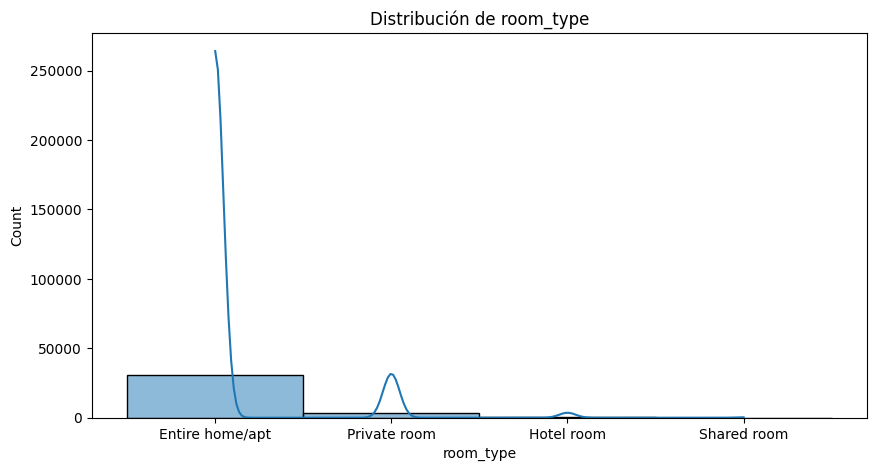

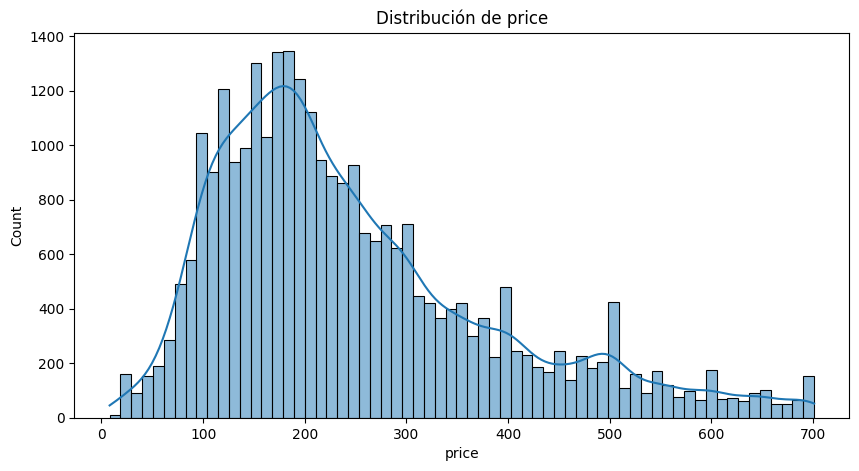

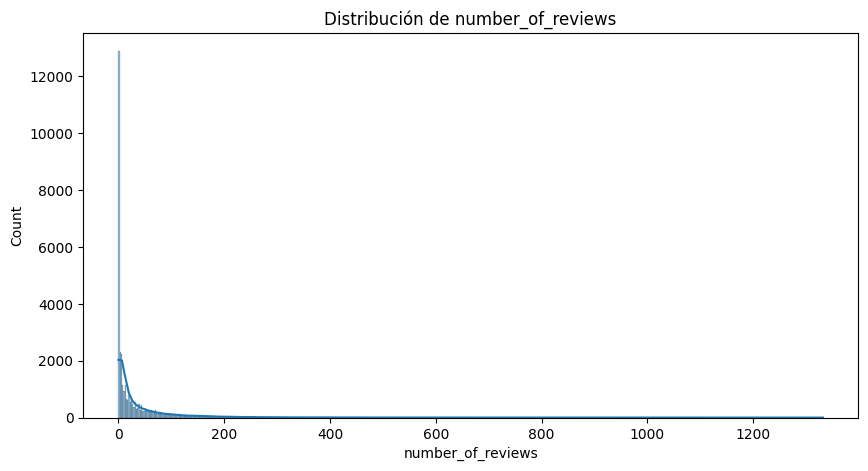

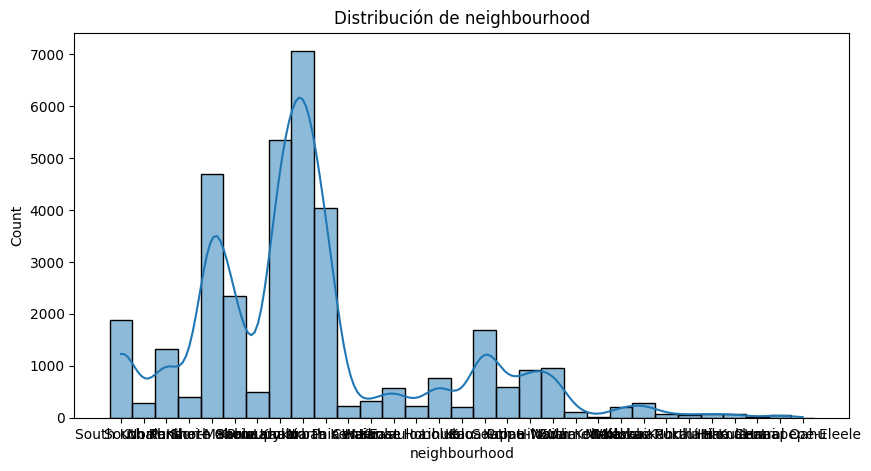

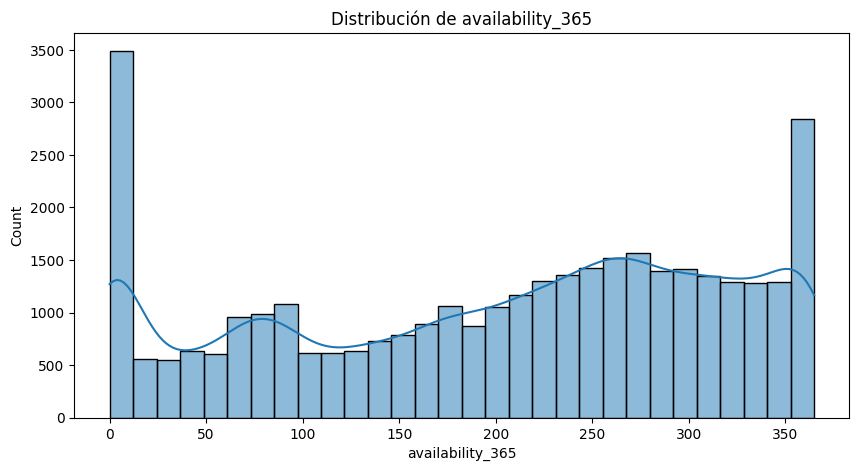

In [61]:
for columna in importantes:
    plt.figure(figsize=(10, 5))
    sns.histplot(listings_df[columna], kde=True)
    plt.title(f"Distribución de {columna}")
    plt.show()

#### Distribución y Comportamiento de los Atributos
- **Precio (`price`)**: La distribución de los precios está centrada alrededor de los $247, pero existe una gran dispersión con propiedades económicas y de lujo. La desviación estándar es de **$139**, lo que indica una variabilidad significativa entre las propiedades.
  
- **Número de reseñas (`number_of_reviews`)**: Aunque muchas propiedades tienen pocas reseñas, algunas tienen una alta visibilidad en la plataforma, lo que sugiere que hay una diferencia considerable en la rotación de las propiedades.
  
- **Disponibilidad (`availability_365`)**: Las propiedades con disponibilidad completa (365 días) representan una minoría, mientras que muchas propiedades tienen una disponibilidad limitada, lo que puede estar relacionado con la demanda estacional o con restricciones del anfitrión.

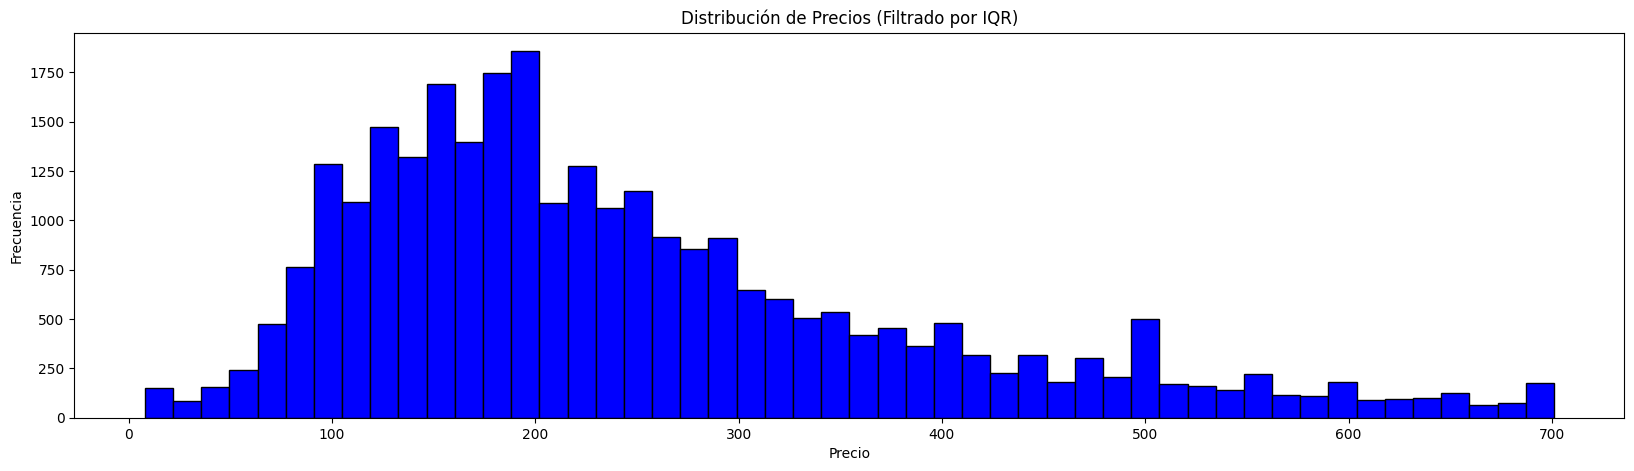

In [25]:
# Cálculo del IQR (Interquartile Range)
q1 = listings_df["price"].quantile(0.25)
q3 = listings_df["price"].quantile(0.75)
iqr = q3 - q1

# Umbral de outliers (1.5 veces el rango intercuartílico)
outlier_threshold = q3 + 1.5 * iqr

# Visualización de la distribución de precios sin outliers
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price"] <= outlier_threshold]["price"], bins=50, color="blue", edgecolor="black")
plt.title("Distribución de Precios (Filtrado por IQR)")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

### Boxplot del precio por tipo de habitación

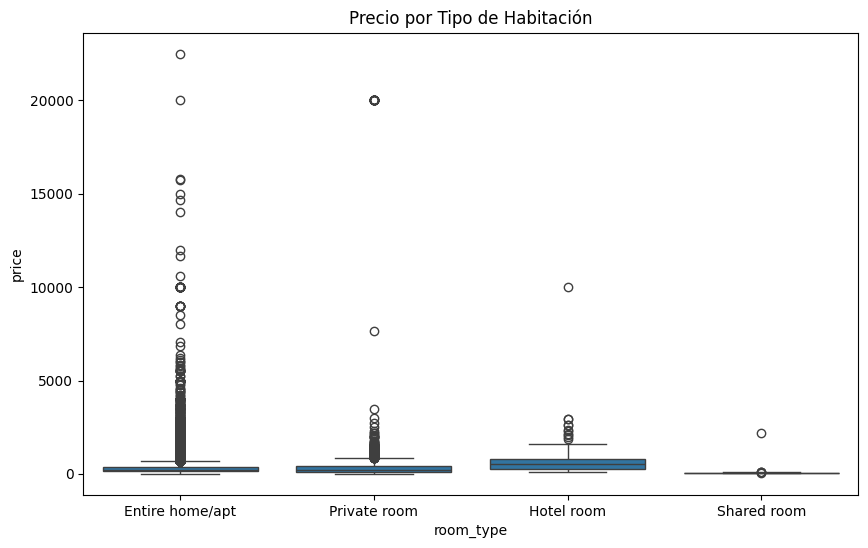

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=listings_df)
plt.title('Precio por Tipo de Habitación')
plt.show()

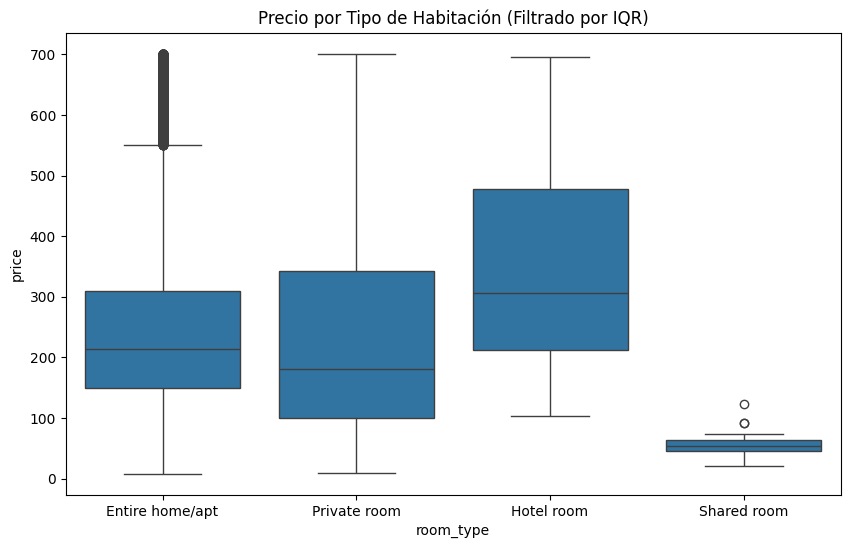

In [43]:
# Filtrar los datos para eliminar precios extremadamente altos
listings_df_filtered = listings_df
listings_df_filtered["price"] = listings_df.loc[listings_df["price"] <= outlier_threshold]["price"]  # Elimina precios basado en el IQR

# Visualizar nuevamente el gráfico sin los outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=listings_df_filtered)
plt.title('Precio por Tipo de Habitación (Filtrado por IQR)')
plt.show()

- Las **habitaciones de hotel** y los **apartamentos completos** son las opciones más caras, con mayor dispersión y variabilidad en precios.
- Las **habitaciones privadas** tienen precios intermedios y menor dispersión, siendo una opción atractiva para aquellos que buscan equilibrio entre costo y privacidad.
- Las **habitaciones compartidas** son las más económicas, pero con poca variabilidad en los precios, lo que las convierte en la opción menos lucrativa.


### Estadísticas descriptivas del precio por vecindario

In [63]:
price_by_neighbourhood = listings_df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
print(price_by_neighbourhood)

neighbourhood
Koloa-Poipu              344.669985
Ewa                      342.807818
Waimea-Kekaha            333.411765
Hana                     321.571429
Koolauloa                313.054945
Lahaina                  312.263916
South Kohala             303.752966
North Shore Kauai        281.699383
Paia-Haiku               277.216495
Lihue                    274.062738
Kapaa-Wailua             268.387879
Lanai                    259.111111
North Shore Oahu         254.701639
Koolaupoko               251.314917
Kihei-Makena             249.753294
Makawao-Pukalani-Kula    248.442857
East Honolulu            245.318436
Waianae                  241.131206
Wailuku-Kahului          231.749020
North Kona               222.192580
Central Oahu             202.098039
South Kona               199.323308
Primary Urban Center     196.664941
North Kohala             195.463918
North Hilo               187.625000
Hamakua                  175.661290
South Hilo               167.449355
Hanapepe-Eleel

### Análisis de disponibilidad de los listados por vecindario

In [64]:
availability_by_neighbourhood = listings_df.groupby('neighbourhood')['availability_365'].mean().sort_values(ascending=False)
print(availability_by_neighbourhood)

neighbourhood
Hanapepe-Eleele          364.000000
Molokai                  272.037915
Kau                      263.009346
Wailuku-Kahului          259.294545
Lanai                    258.700000
Hamakua                  257.089552
Central Oahu             243.385965
Paia-Haiku               238.824324
Puna                     234.054504
East Honolulu            233.119266
Hana                     232.986486
Waianae                  232.437309
Makawao-Pukalani-Kula    231.800000
South Hilo               225.460237
North Kohala             222.803419
Waimea-Kekaha            222.666667
Koolauloa                218.254766
South Kona               216.083333
South Kohala             215.641067
North Hilo               214.870968
Koolaupoko               214.275720
Kapaa-Wailua             208.246767
Primary Urban Center     204.211555
Koloa-Poipu              203.658190
Kihei-Makena             203.027914
North Shore Oahu         197.714286
North Shore Kauai        196.109876
Lihue         

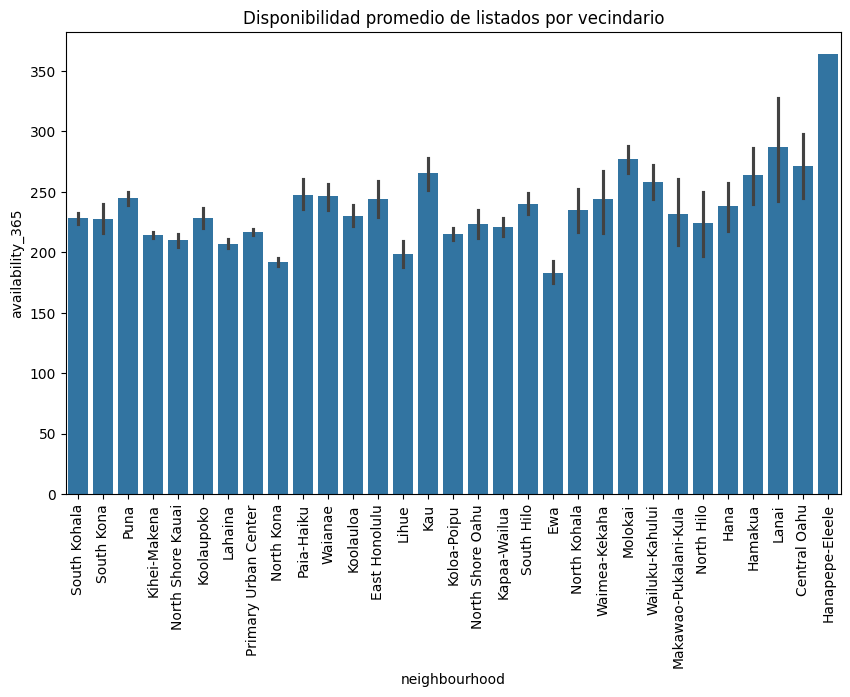

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood', y='availability_365', data=listings_df_clean)
plt.xticks(rotation=90)
plt.title('Disponibilidad promedio de listados por vecindario')
plt.show()

### Número de reseñas por vecindario

In [65]:
# Agrupar por barrio y calcular el número total de reseñas
reviews_by_neighbourhood = listings_df.groupby('neighbourhood')['number_of_reviews'].sum().sort_values(ascending=False)

# Mostrar los resultados
print(reviews_by_neighbourhood)

neighbourhood
Primary Urban Center     279077
Kihei-Makena             189115
North Kona               163912
Puna                     106363
Lahaina                   85212
North Shore Kauai         85071
Koloa-Poipu               40622
South Hilo                40380
South Kohala              37475
Koolauloa                 34139
Kapaa-Wailua              30535
Paia-Haiku                26279
South Kona                21721
Hana                      17294
North Shore Oahu          16145
Kau                       14941
Koolaupoko                14729
Ewa                       11064
Lihue                     10202
Waianae                    9742
Wailuku-Kahului            9484
Hamakua                    7203
Molokai                    6303
North Kohala               5800
East Honolulu              5550
Makawao-Pukalani-Kula      5483
North Hilo                 3824
Waimea-Kekaha              2663
Lanai                      1083
Central Oahu                686
Hanapepe-Eleele           